In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

In [93]:
df = pd.read_csv("NYPD_Complaint_Data_Current__Year_To_Date_.csv")

c:\Users\carso\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [59]:
df.head()

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,JURISDICTION_CODE,JURIS_DESC,KY_CD,LAW_CAT_CD,LOC_OF_OCCUR_DESC,OFNS_DESC,PARKS_NM,PATROL_BORO,PD_CD,PD_DESC,PREM_TYP_DESC,RPT_DT,STATION_NAME,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,270652286,43.0,BRONX,07/01/2023,05:00:00,NaN,(null),COMPLETED,(null),NaN,0,N.Y. POLICE DEPT,104,FELONY,(null),RAPE,(null),PATROL BORO BRONX,157.0,RAPE 1,(null),07/01/2023,(null),25-44,WHITE,M,NaN,25-44,UNKNOWN,F,1020219.0,239110.0,40.822912,-73.870041,"(40.8229123084767, -73.8700413043181)",POINT (-73.8700413043181 40.8229123084767),11611.0,58.0,5.0,31.0,26.0
1,269679657H1,NaN,MANHATTAN,06/09/2023,08:13:00,NaN,(null),COMPLETED,(null),NaN,0,N.Y. POLICE DEPT,101,FELONY,OUTSIDE,MURDER & NON-NEGL. MANSLAUGHTER,(null),PATROL BORO MAN SOUTH,NaN,(null),(null),06/09/2023,(null),25-44,BLACK,M,NaN,25-44,BLACK,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,270825324,122.0,STATEN ISLAND,07/02/2023,19:30:00,07/02/2023,20:00:00,COMPLETED,(null),NaN,0,N.Y. POLICE DEPT,351,MISDEMEANOR,INSIDE,CRIMINAL MISCHIEF & RELATED OF,(null),PATROL BORO STATEN ISLAND,259.0,"CRIMINAL MISCHIEF,UNCLASSIFIED 4",RESIDENCE-HOUSE,07/03/2023,(null),45-64,WHITE,M,NaN,25-44,WHITE,F,946681.0,142778.0,40.558491,-74.135201,"(40.558491, -74.135201)",POINT (-74.135201 40.558491),10693.0,15.0,1.0,9.0,76.0
3,274700214,1.0,MANHATTAN,09/19/2023,18:05:00,09/19/2023,20:15:00,COMPLETED,(null),NaN,0,N.Y. POLICE DEPT,341,MISDEMEANOR,INSIDE,PETIT LARCENY,(null),PATROL BORO MAN SOUTH,339.0,"LARCENY,PETIT FROM OPEN AREAS,",STREET,09/19/2023,(null),UNKNOWN,WHITE HISPANIC,M,NaN,25-44,ASIAN / PACIFIC ISLANDER,M,980863.0,198480.0,40.711458,-74.012216,"(40.711458, -74.012216)",POINT (-74.012216 40.711458),11727.0,56.0,4.0,32.0,1.0
4,272352661,123.0,STATEN ISLAND,08/03/2023,17:20:00,08/03/2023,17:35:00,COMPLETED,(null),NaN,0,N.Y. POLICE DEPT,109,FELONY,INSIDE,GRAND LARCENY,(null),PATROL BORO STATEN ISLAND,411.0,"LARCENY,GRAND FROM EATERY, UNATTENDED",FAST FOOD,08/03/2023,(null),25-44,ASIAN / PACIFIC ISLANDER,M,NaN,18-24,WHITE,F,926582.0,136703.0,40.541709,-74.207482,"(40.541709, -74.207482)",POINT (-74.207482 40.541709),10696.0,15.0,1.0,9.0,77.0


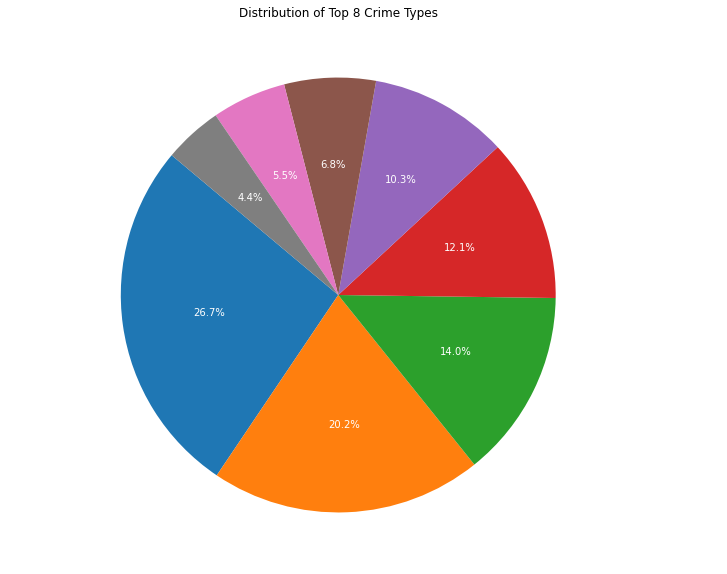

In [145]:
# Create a pie chart to show the distribution of different crime types
crime_type_distribution = df['OFNS_DESC'].value_counts().head(8)
plt.figure(figsize=(10, 10))
plt.pie(crime_type_distribution, labels=crime_type_distribution.index, autopct='%1.1f%%', startangle=140, textprops= {'color':"w"})
plt.title('Distribution of Top 8 Crime Types')
plt.show()


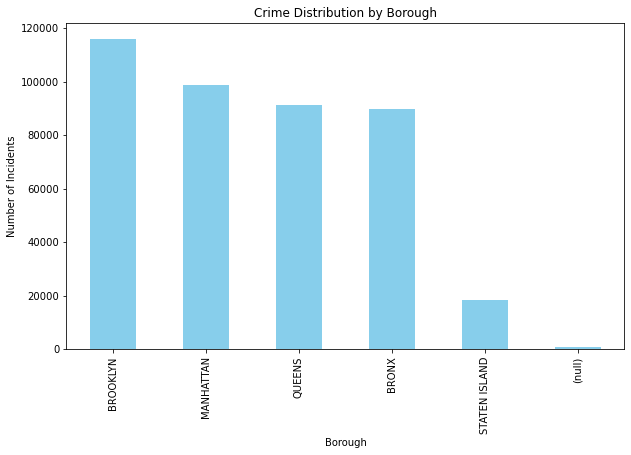

In [55]:
# Group by borough and count the number of incidents
incident_count_by_borough = df['BORO_NM'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
incident_count_by_borough.plot(kind='bar', color='skyblue')
plt.title('Crime Distribution by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Incidents')
plt.show()

<Figure size 864x576 with 0 Axes>

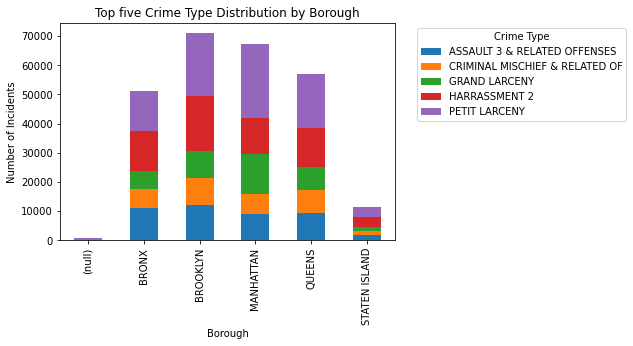

In [90]:
# Get the top five crime types
top_crime_types = df['OFNS_DESC'].value_counts().head(5).index

# Filter the dataframe to include only the top 5 crime types
df_top_ten = df[df['OFNS_DESC'].isin(top_crime_types)]

# Create a pivot table for crime type distribution by borough
crime_type_by_borough_top_ten = df_top_ten.pivot_table(index='BORO_NM', columns='OFNS_DESC', aggfunc='size', fill_value=0)

# Plot the stacked bar chart
plt.figure(figsize=(12, 8))
crime_type_by_borough_top_ten.plot(kind='bar', stacked=True)
plt.title('Top five Crime Type Distribution by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Incidents')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [126]:
# find out the top 5 patrol boro in each level of offense category
grouped_df = df.groupby('LAW_CAT_CD')['PATROL_BORO'].value_counts()
result_df = pd.DataFrame(grouped_df.groupby('LAW_CAT_CD').nlargest(5))
result_df = result_df.rename(columns={"PATROL_BORO": "count"}).droplevel(1)
result_df

count
LAW_CAT_CD  PATROL_BORO                    
FELONY      PATROL BORO BRONX         31507
            PATROL BORO BKLYN NORTH   19856
            PATROL BORO BKLYN SOUTH   19216
            PATROL BORO MAN SOUTH     17923
            PATROL BORO QUEENS NORTH  16878
MISDEMEANOR PATROL BORO BRONX         43960
            PATROL BORO BKLYN SOUTH   29612
            PATROL BORO MAN SOUTH     27840
            PATROL BORO BKLYN NORTH   27728
            PATROL BORO MAN NORTH     25104
VIOLATION   PATROL BORO BRONX         14281
            PATROL BORO BKLYN NORTH    9980
            PATROL BORO BKLYN SOUTH    9749
            PATROL BORO MAN NORTH      7230
            PATROL BORO QUEENS SOUTH   7015

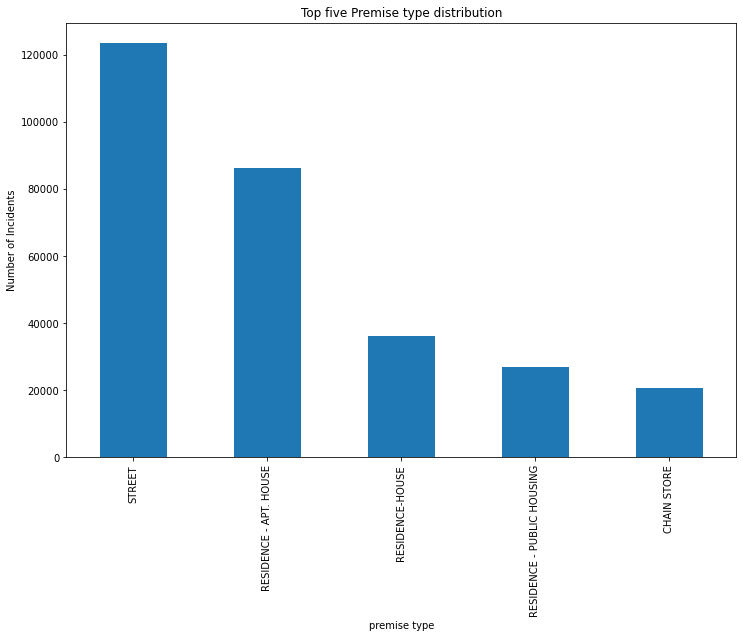

In [160]:
# Create a bar plot showing the count of the top premise type 
plt.figure(figsize=(12, 8))
df["PREM_TYP_DESC"].value_counts()[:5].plot(kind='bar')
plt.title('Top five Premise type distribution')
plt.xlabel('premise type')
plt.ylabel('Number of Incidents')
plt.show()

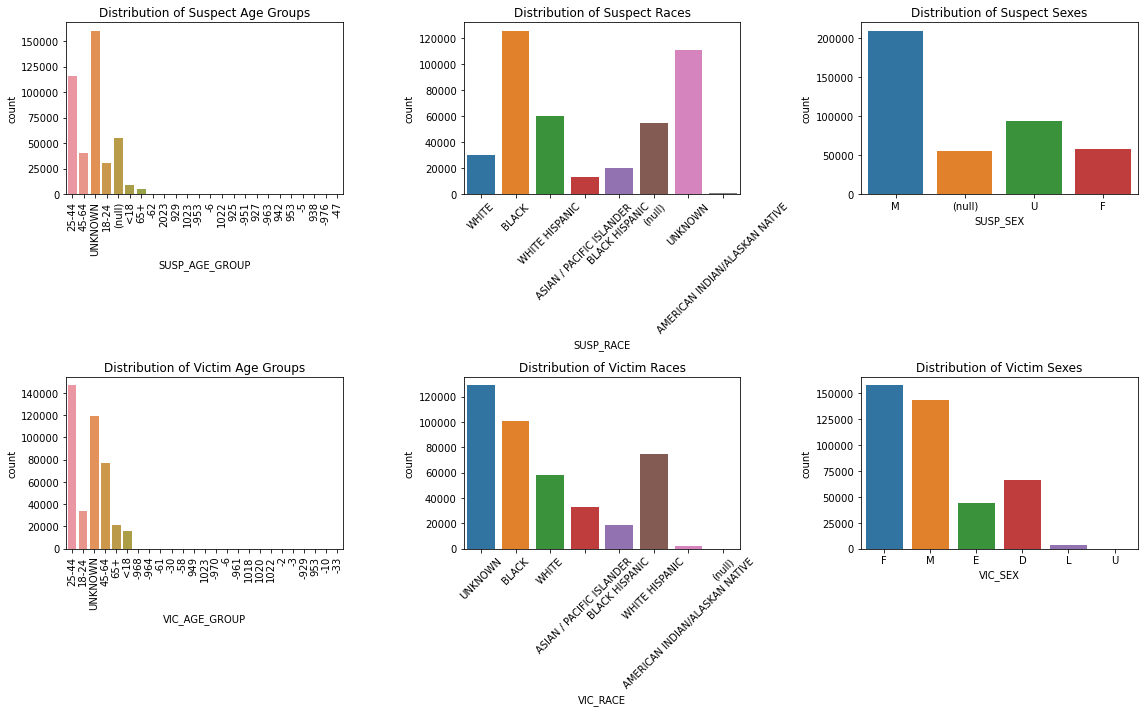

In [132]:
# Create bar charts for suspect and victim demographics
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Suspect Age Group
sns.countplot(x='SUSP_AGE_GROUP', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Suspect Age Groups')
axes[0, 0].tick_params(axis='x', rotation=90)

# Suspect Race
sns.countplot(x='SUSP_RACE', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Suspect Races')
axes[0, 1].tick_params(axis='x', rotation=45)

# Suspect Sex
sns.countplot(x='SUSP_SEX', data=df, ax=axes[0, 2])
axes[0, 2].set_title('Distribution of Suspect Sexes')

# Victim Age Group
sns.countplot(x='VIC_AGE_GROUP', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Victim Age Groups')
axes[1, 0].tick_params(axis='x', rotation=90)

# Victim Race
sns.countplot(x='VIC_RACE', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Victim Races')
axes[1, 1].tick_params(axis='x', rotation=45)

# Victim Sex
sns.countplot(x='VIC_SEX', data=df, ax=axes[1, 2])
axes[1, 2].set_title('Distribution of Victim Sexes')

plt.tight_layout()
plt.show()



Dear Mayor Eric Adams,

As I am sure you are well aware, we have had quite the crime problem in our lovely New York City. I have done some analysis into the current state of crime in NYC. I have used data from NYC open data of all NYPD complaints from the year to date. I know that you are on a little bit of a time crunch so I will keep this quick. To begin, I did some analysis to find the most common types of crime shown on a pie plot below

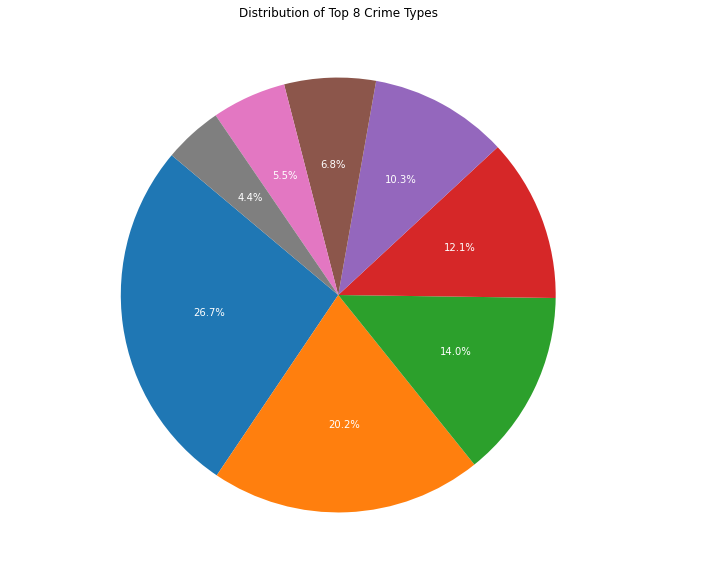


I found that Petit Larceny and Harrassment made up nearly half of the top 8 crimes. This shows how more low key crime and misdemeanors are the most common. After figureing this out I want to know where this crime was happening the most so I looked at the top 5 premises that crime occured, shown in the graph below:

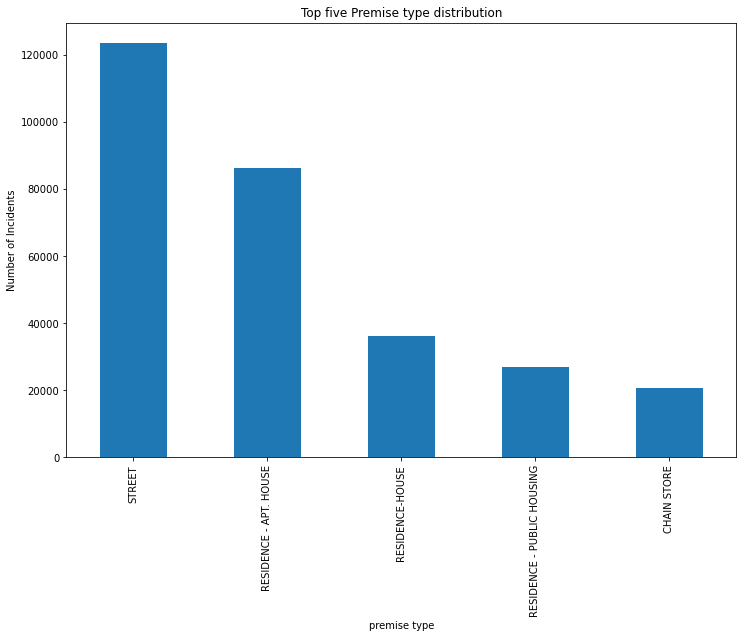

this graph explains how the majority of this crime is happening on the street are in a residence - apt house. I believe that this gives strong evidence on how we need more street patrol that is actively observing what is going on in the public. We should also have patrol walking the streets and past these high crime apartment complexes in the hopes of becoming more proactive than reactive with these apartment and street crimes. Going along with the top crimes, it is important to know what crime and how much crime occurs in each Borough so the graph below shows a stacked bar graphs of top crimes in each borough

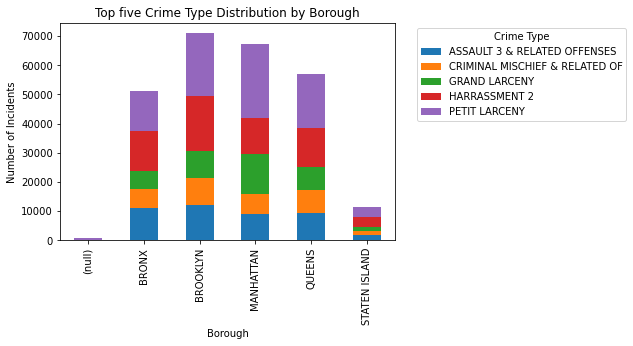

This graph complements and reinforces the facts on how the misdemenors and smaller crime are causing the most problems. I think this goes to prove that the polic department is tending to overlook these smaller crimes because of how they are not as severe. this is a huge problem in many large cities and especially here in NYC because the crime that is happening the most and causing people a lot of harm evey single day even if its not deadly pain should still be treated like it is high priority. We work for the people so it should appear that we care for the wellbeing of every citizen, and that meaning preventing the most common crimes. Lastly, I did some analysis on the different demographics of the suspects and the victims shown in the graph below




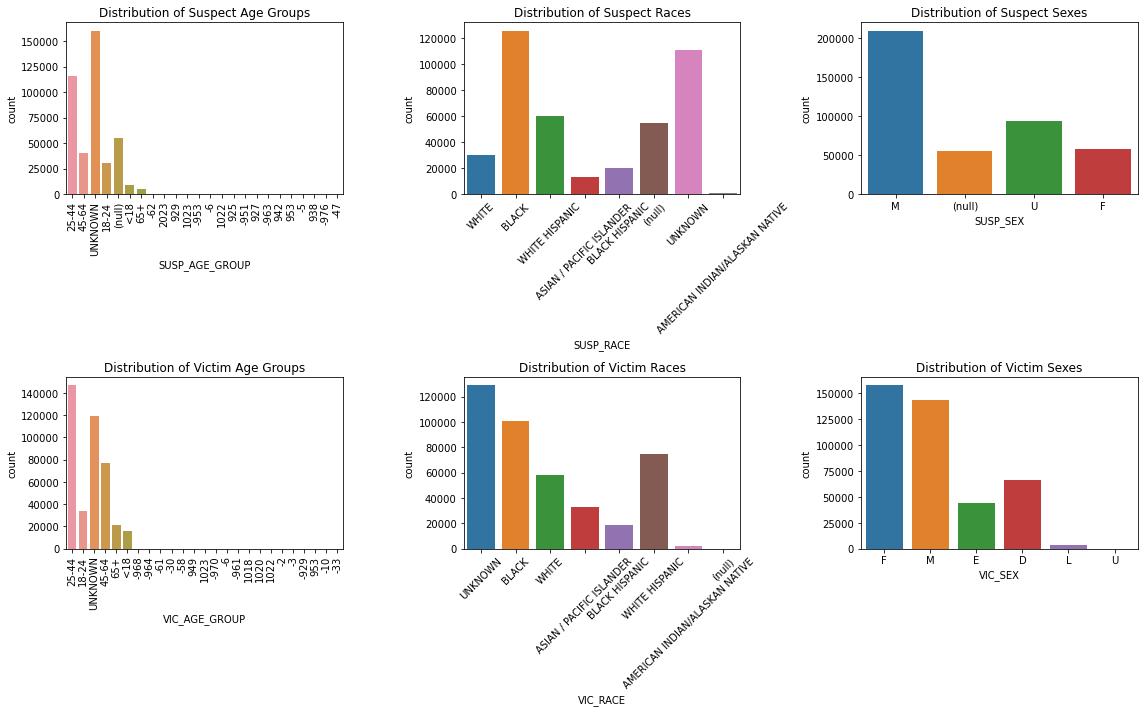

By looking at the distribution of suspect age groups you find 25-44 having the majority of known ages by far however when you look at the victims, you find that the age group 25-44 is still very high but 45-64 is much higher than it was for the suspects. This means that older adults in NYC are becoming victims of a lot of crime as well. A problem with this data is that it appears that we do not gather a large percentage of the victims and suspects characteristics like their age and race which shows how our police department may be lacking in this aspect of recording data. Lastly, looking at the gender distribution we find that female suspects are much less than Male suspects but then female victims have the highest distribution. This shows a potential gender related pattern in criminal behavior and maybe even in law enforcement interactions. I hope that we can address some of these issues and work towards a greater and safer New York City.

Thank you,
Carson Batchelor